In [3]:
import pandas as pd

# Load the dataset
file_path = '/content/Original_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for initial exploration
data.head(), data.shape, data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   GENDER                                                                                                                  40 non-null     object
 1   AGE                                                                                                                     40 non-null     int64 
 2   Do you invest in Investment Avenues?                                                                                    40 non-null     object
 3   What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]           40 non-null     int64 
 4   What

(   GENDER  AGE Do you invest in Investment Avenues?  \
 0  Female   34                                  Yes   
 1  Female   23                                  Yes   
 2    Male   30                                  Yes   
 3    Male   22                                  Yes   
 4  Female   24                                   No   
 
    What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]  \
 0                                                  1                                                               
 1                                                  4                                                               
 2                                                  3                                                               
 3                                                  2                                                               
 4                                                  2                        

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Preprocessing the data

# Encoding categorical columns
le = LabelEncoder()
data['GENDER'] = le.fit_transform(data['GENDER'])
data['Do you invest in Investment Avenues?'] = le.fit_transform(data['Do you invest in Investment Avenues?'])
data['Do you invest in Stock Market?'] = le.fit_transform(data['Do you invest in Stock Market?'])

# Standardizing the numerical columns
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['int64']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the first few rows of the preprocessed dataset
data.head(), data.describe()

(     GENDER       AGE  Do you invest in Investment Avenues?  \
 0 -1.290994  1.763528                              0.284747   
 1 -1.290994 -1.365312                              0.284747   
 2  0.774597  0.625768                              0.284747   
 3  0.774597 -1.649752                              0.284747   
 4 -1.290994 -1.080872                             -3.511885   
 
    What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]  \
 0                                          -1.311160                                                               
 1                                           1.226569                                                               
 2                                           0.380659                                                               
 3                                          -0.465250                                                               
 4                           

In [9]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=eac63ecc55a3b47e328778a992ed8b4e426aeae5a72e817eaa0b747d98848dba
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [8]:
# Identifying non-numeric columns
non_numeric_cols = data.select_dtypes(include=['object']).columns

# Applying label encoding or conversion to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in non_numeric_cols:
    # If the column should be label encoded
    data[col] = le.fit_transform(data[col])
    # If the column contains string representations of numbers
    # data[col] = pd.to_numeric(data[col], errors='coerce')

In [9]:
from umap import UMAP
umap = UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)
umap_transformed = umap.fit_transform(data)
umap_df = pd.DataFrame(umap_transformed, columns=['UMAP_1', 'UMAP_2'])

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


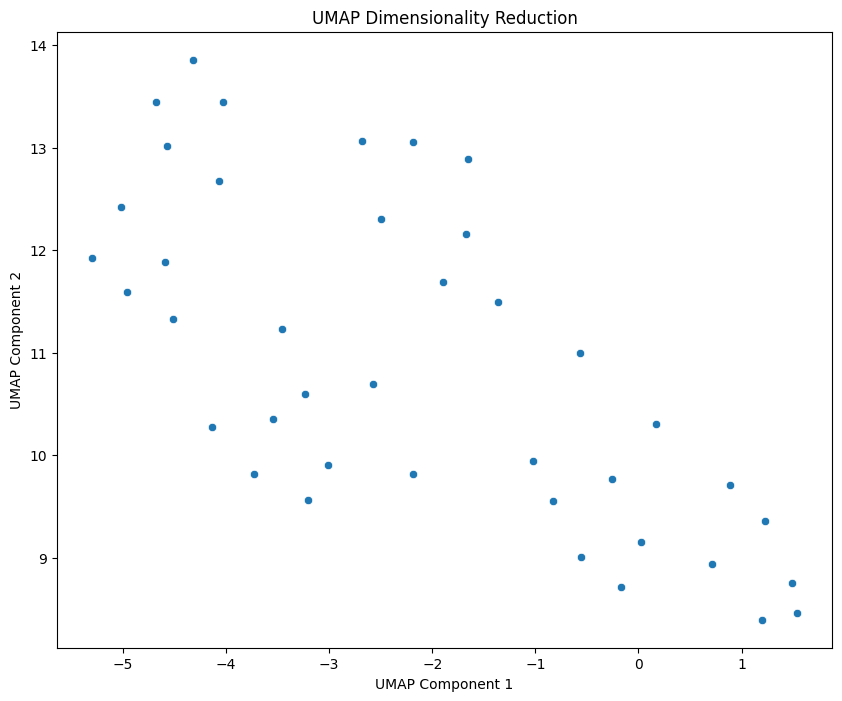

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of the UMAP reduced data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP_1', y='UMAP_2', data=umap_df)
plt.title('UMAP Dimensionality Reduction')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


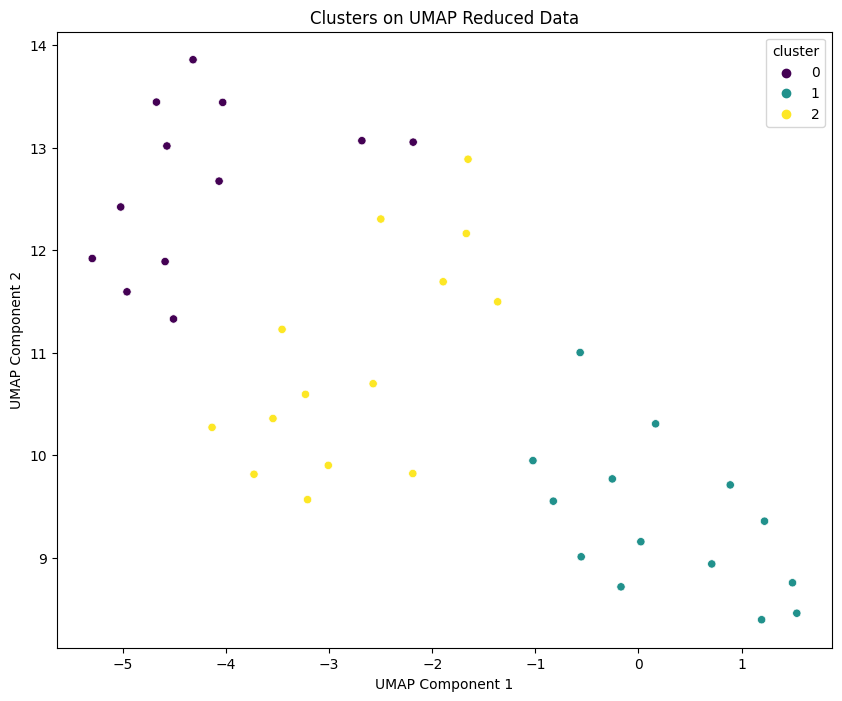

In [11]:
from sklearn.cluster import KMeans

# Choosing the number of clusters (k) - this may require some experimentation
k = 3  # Example value

# Applying K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
umap_df['cluster'] = kmeans.fit_predict(umap_transformed)

# Visualizing the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='cluster', data=umap_df, palette='viridis')
plt.title('Clusters on UMAP Reduced Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, umap_df['cluster'], test_size=0.3, random_state=42)

# Training a RandomForest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicting on the test set
predictions = clf.predict(X_test)

# Evaluating the classifier
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         4
           2       1.00      0.80      0.89         5

    accuracy                           0.92        12
   macro avg       0.93      0.93      0.93        12
weighted avg       0.93      0.92      0.92        12

